In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
//Prevent scrolling in cell output

<IPython.core.display.Javascript object>

In [2]:
from sox.transform import Transformer
import nussl
from nussl.datasets import MUSDB18
import matplotlib.pyplot as plt

musdb = MUSDB18(download=True)
signal = musdb[0]['mix']
sr = signal.sample_rate
signal.embed_audio()
print()

In [3]:
data = signal.audio_data
def compare(factor):
    tfm = Transformer()
    stretch_data = tfm.stretch(1/factor).build_array(
        input_array=data.T,
        sample_rate_in=sr
    )
    tfm = Transformer()
    tempo_data = tfm.tempo(factor).build_array(
        input_array=data.T,
        sample_rate_in=sr
    )

    stretch_signal = nussl.AudioSignal(audio_data_array=stretch_data, sample_rate=sr)
    tempo_signal = nussl.AudioSignal(audio_data_array=tempo_data, sample_rate=sr)
    print(f"Factor = {factor}")
    print(f"Stretched Signal is {stretch_signal.signal_duration} seconds long.\n" + 
          f"It should be {signal.signal_duration / factor} seconds long")
    print("Below is stretched signal")
    nussl.core.utils.visualize_spectrogram(stretch_signal, y_axis="log")
    plt.show()
    stretch_signal.embed_audio()

    print(f"Tempo Signal is {tempo_signal.signal_duration} seconds long.\n" + 
          f"It should be {signal.signal_duration / factor} seconds long")
    print("Below is tempo signal")
    nussl.core.utils.visualize_spectrogram(tempo_signal, y_axis="log")
    plt.show()
    tempo_signal.embed_audio()


For this stretch factor, the tempo effect has better performance.


Factor = 0.5
Stretched Signal is 13.623310657596372 seconds long.
It should be 13.606893424036281 seconds long
Below is stretched signal


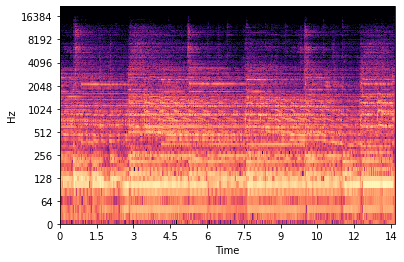

Tempo Signal is 13.606893424036281 seconds long.
It should be 13.606893424036281 seconds long
Below is tempo signal


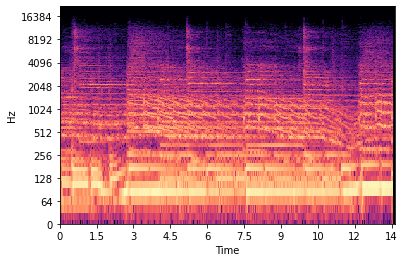

For this stretch factor, the tempo effect has better performance.


Factor = 0.7142857142857143
Stretched Signal is 9.533424036281179 seconds long.
It should be 9.524825396825397 seconds long
Below is stretched signal


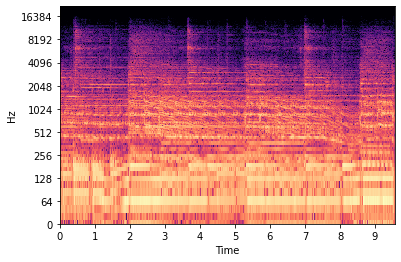

Tempo Signal is 9.52482993197279 seconds long.
It should be 9.524825396825397 seconds long
Below is tempo signal


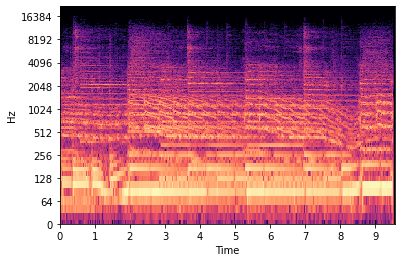

For this stretch factor, the stretch effect has better performance.


Factor = 0.95
Stretched Signal is 7.169160997732426 seconds long.
It should be 7.161522854755938 seconds long
Below is stretched signal


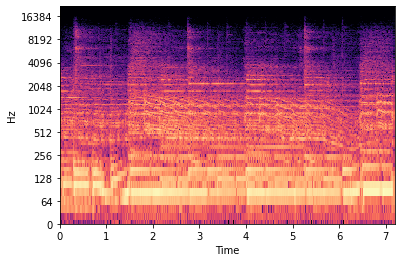

Tempo Signal is 7.161519274376417 seconds long.
It should be 7.161522854755938 seconds long
Below is tempo signal


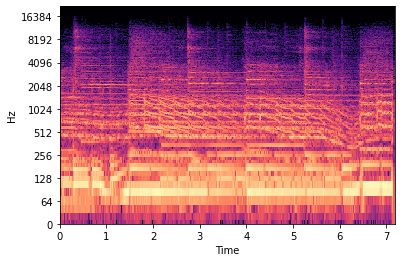

For this stretch factor, the stretch effect has better performance.


Factor = 1.05
Stretched Signal is 6.479637188208617 seconds long.
It should be 6.479473059064896 seconds long
Below is stretched signal


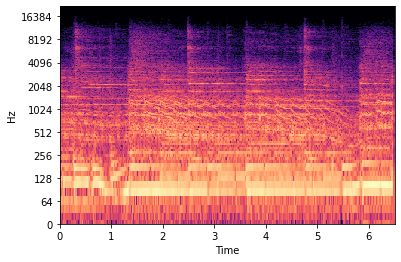

Tempo Signal is 6.479478458049886 seconds long.
It should be 6.479473059064896 seconds long
Below is tempo signal


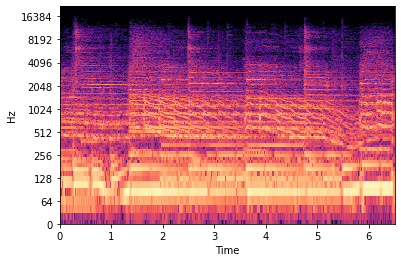

For this stretch factor, the tempo effect has better performance.


Factor = 1.4
Stretched Signal is 4.8605895691609975 seconds long.
It should be 4.859604794298672 seconds long
Below is stretched signal


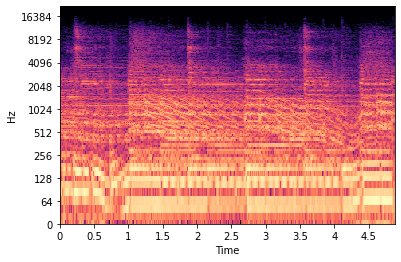

Tempo Signal is 4.859614512471655 seconds long.
It should be 4.859604794298672 seconds long
Below is tempo signal


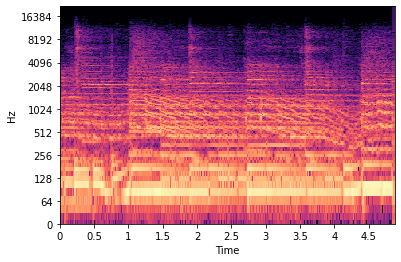

For this stretch factor, the tempo effect has better performance.


Factor = 2
Stretched Signal is 3.4034467120181406 seconds long.
It should be 3.4017233560090703 seconds long
Below is stretched signal


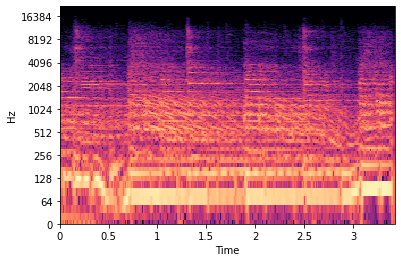

Tempo Signal is 3.4017233560090703 seconds long.
It should be 3.4017233560090703 seconds long
Below is tempo signal


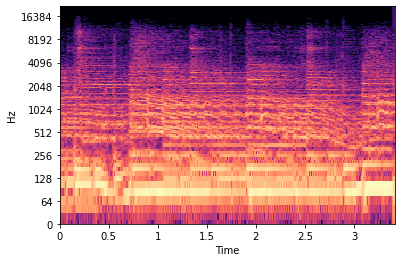

In [4]:
# Try out a variety of factors
compare(.5)
compare(1/1.4)
compare(.95)
compare(1.05)
compare(1.4)
compare(2)